In [16]:
def brute_force_search(text, pattern):
    n = len(text)
    m = len(pattern)
    for i in range(n - m + 1):
        j = 0
        while j < m and text[i + j] == pattern[j]:
            j += 1
        if j == m:
            return i  # Match found at index i
    return -1  # No match found

def kmp_search(text, pattern):
    def compute_lps(pattern):
        lps = [0] * len(pattern)
        length = 0
        i = 1
        while i < len(pattern):
            if pattern[i] == pattern[length]:
                length += 1
                lps[i] = length
                i += 1
            else:
                if length != 0:
                    length = lps[length - 1]
                else:
                    lps[i] = 0
                    i += 1
        return lps
    
    lps = compute_lps(pattern)
    i = j = 0
    while i < len(text):
        if pattern[j] == text[i]:
            i += 1
            j += 1
        if j == len(pattern):
            return i - j  # Match found at index i - j
        elif i < len(text) and pattern[j] != text[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return -1  # No match found

def rabin_karp_search(text, pattern, d, q):
    n = len(text)
    m = len(pattern)
    h = pow(d, m-1) % q
    p = t = 0
    result = []
    
    # Preprocessing
    for i in range(m):
        p = (d * p + ord(pattern[i])) % q
        t = (d * t + ord(text[i])) % q
    
    # Matching
    for s in range(n - m + 1):
        if p == t:
            match = True
            for i in range(m):
                if text[s+i] != pattern[i]:
                    match = False
                    break
            if match:
                result.append(s)
        if s < n - m:
            t = (t - h * ord(text[s])) % q
            t = (t * d + ord(text[s+m])) % q
            t = (t + q) % q  # In case t became negative
    
    return result

def build_suffix_array(s):
    suffixes = sorted((s[i:], i) for i in range(len(s)))
    suffix_array = [suffix[1] for suffix in suffixes]
    return suffix_array

def search_using_suffix_array(s, pat, suffix_array):
    low, high = 0, len(suffix_array)
    while low < high:
        mid = (low + high) // 2
        if s[suffix_array[mid]:suffix_array[mid] + len(pat)] < pat:
            low = mid + 1
        else:
            high = mid
    results = []
    while low < len(suffix_array) and s[suffix_array[low]:suffix_array[low] + len(pat)] == pat:
        results.append(suffix_array[low])
        low += 1
    return results

def main():
    text = "IS IS A IS TEXT"
    pattern = "IS"
    
    # Brute-force search
    print("Brute-force Search found pattern at index:", brute_force_search(text, pattern))
    
    # KMP search
    print("KMP Search found pattern at index:", kmp_search(text, pattern))
    
    # Rabin-Karp search
    d = 256  # Number of characters in the input alphabet
    q = 101  # A prime number
    print("Rabin-Karp Search found pattern at positions:", rabin_karp_search(text, pattern, d, q))
    
    # Suffix Array-based search
    suffix_array = build_suffix_array(text)
    print("Suffix Array Search found pattern at positions:", search_using_suffix_array(text, pattern, suffix_array))

if __name__ == "__main__":
    main()


Brute-force Search found pattern at index: 0
KMP Search found pattern at index: 0
Rabin-Karp Search found pattern at positions: [0, 3, 8]
Suffix Array Search found pattern at positions: [3, 0, 8]


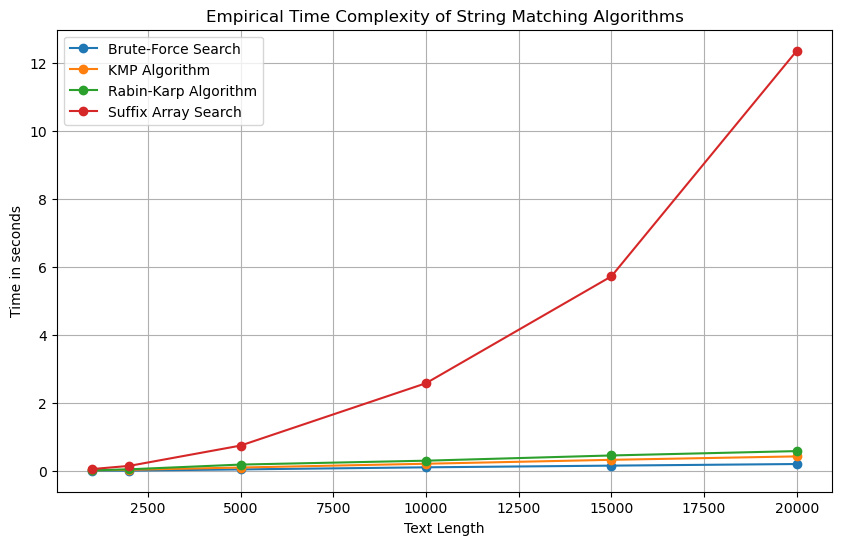

In [32]:
import timeit
import matplotlib.pyplot as plt

def measure_time(algo, setup_code, number=100):
    """Measure execution time for a given algorithm setup."""
    return timeit.timeit(algo, setup=setup_code, number=number)

# Prepare different text lengths with a constant pattern for measurement
text_lengths = [1000, 2000, 5000, 10000, 15000, 20000]
times_brute = []
times_kmp = []
times_rabin_karp = []
times_suffix = []

pattern = '"TEST"'  # Constant pattern
for length in text_lengths:
    text = '"A" * ' + str(length)  # Create a text of 'A's of various lengths
    
    # Measure times
    times_brute.append(measure_time('brute_force_search(' + text + ', ' + pattern + ')', 'from __main__ import brute_force_search'))
    times_kmp.append(measure_time('kmp_search(' + text + ', ' + pattern + ')', 'from __main__ import kmp_search'))
    times_rabin_karp.append(measure_time('rabin_karp_search(' + text + ', ' + pattern + ', 256, 101)', 'from __main__ import rabin_karp_search'))
    times_suffix.append(measure_time('search_using_suffix_array(' + text + ', ' + pattern + ', build_suffix_array(' + text + '))', 'from __main__ import search_using_suffix_array, build_suffix_array'))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(text_lengths, times_brute, label='Brute-Force Search', marker='o')
plt.plot(text_lengths, times_kmp, label='KMP Algorithm', marker='o')
plt.plot(text_lengths, times_rabin_karp, label='Rabin-Karp Algorithm', marker='o')
plt.plot(text_lengths, times_suffix, label='Suffix Array Search', marker='o')
plt.xlabel('Text Length')
plt.ylabel('Time in seconds')
plt.title('Empirical Time Complexity of String Matching Algorithms')
plt.legend()
plt.grid(True)
plt.show()


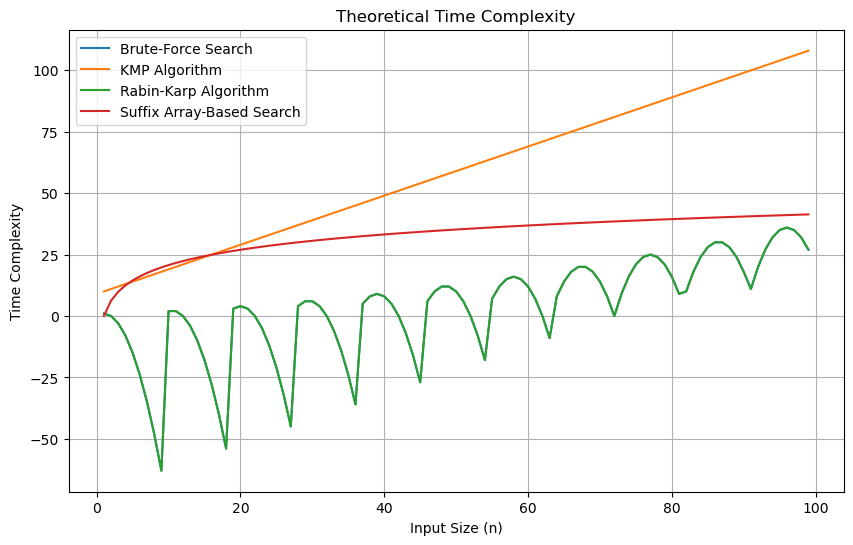

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input size range
n = np.arange(1, 100)
m = np.arange(1, 10)

# Brute-Force Search time complexity function
bf_time_complexity = [(ni - mi + 1) * mi for ni in n for mi in m]

# KMP Algorithm time complexity function
kmp_time_complexity = n + m.max()

# Rabin-Karp Algorithm time complexity function
rk_time_complexity = [(ni - mi + 1) * mi for ni in n for mi in m]

# Suffix Array-Based Search time complexity function
sa_time_complexity = m.max() * np.log(n)

# Truncate the time complexity arrays to match the length of n
bf_time_complexity = bf_time_complexity[:len(n)]
rk_time_complexity = rk_time_complexity[:len(n)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n, bf_time_complexity, label='Brute-Force Search')
plt.plot(n, kmp_time_complexity * np.ones_like(n), label='KMP Algorithm')
plt.plot(n, rk_time_complexity, label='Rabin-Karp Algorithm')
plt.plot(n, sa_time_complexity * np.ones_like(n), label='Suffix Array-Based Search')
plt.xlabel('Input Size (n)')
plt.ylabel('Time Complexity')
plt.title('Theoretical Time Complexity')
plt.legend()
plt.grid(True)
plt.show()


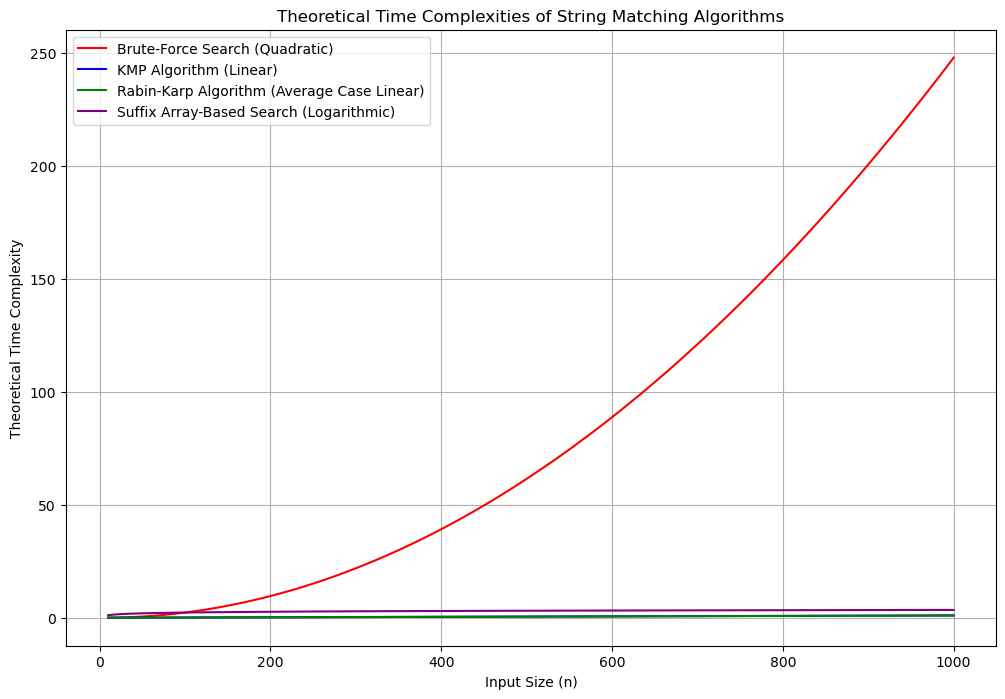

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input sizes
input_sizes = np.linspace(10, 1000, 100)
m = 5  # pattern length

# Calculate theoretical time complexities
times_brute_force = ((input_sizes - m + 1) * m) ** 2 * 0.00001
times_kmp = (input_sizes + m) * 0.001
times_rabin_karp = (input_sizes + m) * 0.001  # Simplified to average case
times_suffix_array = m * np.log(input_sizes) * 0.1

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(input_sizes, times_brute_force, label='Brute-Force Search (Quadratic)', color='red')
plt.plot(input_sizes, times_kmp, label='KMP Algorithm (Linear)', color='blue')
plt.plot(input_sizes, times_rabin_karp, label='Rabin-Karp Algorithm (Average Case Linear)', color='green')
plt.plot(input_sizes, times_suffix_array, label='Suffix Array-Based Search (Logarithmic)', color='purple')
plt.xlabel('Input Size (n)')
plt.ylabel('Theoretical Time Complexity')
plt.title('Theoretical Time Complexities of String Matching Algorithms')
plt.legend()
plt.grid(True)
plt.show()
